In [263]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import StandardScaler


LR=LinearRegression(fit_intercept=True)

In [264]:
dataset = pd.read_csv('50_Startups.csv')
dataset = dataset.drop('State', axis=1)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values #-1 selects last column regardless of column count (column 3 is State) So with state column dropped, [:, -1] selects whole dataset besides state 
dataset

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


Step 2: Get the Data

    2.3: Data Fetch Routine #local for now
    TODO: auto fetch to new devices?

### 2.10 Check the size and type of data

In [265]:
# Print the size of the dataset
print("Size of the dataset:")
print(dataset.shape)

# Print the data types of the columns
print("\nData types:")
print(dataset.dtypes)

Size of the dataset:
(50, 4)

Data types:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object


### 2.11: Test Set

In [266]:
import numpy as np
#preparing test data... TODO: small dataset = need """stratification"""

def shuffle_and_split_data(dataset, test_ratio):
    shuffled_indices = np.random.permutation(len(dataset))
    test_set_size = int(len(dataset) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return dataset.iloc[train_indices], dataset.iloc[test_indices]

In [267]:
train_set, test_set = shuffle_and_split_data(dataset, 0.2)
len(train_set)

40

In [268]:
np.random.seed(42) #random seed ensure notebook output remain same each runtime

In [269]:
from zlib import crc32 #something for testing idk ;_;
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.float64(identifier)) < test_ratio * 2**32


def split_data_with_id_hash(dataset, test_ratio, id_column):
    ids = dataset[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return dataset.loc[~in_test_set], dataset.loc[in_test_set]

In [270]:
set_with_id = dataset.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(set_with_id, 0.2, "index")

In [271]:
set_with_id["id"] = dataset['R&D Spend'] / dataset["Marketing Spend"] # edit math to match formular
train_set, test_set = split_data_with_id_hash(set_with_id, 0.2, "id")

In [272]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [273]:
test_set["Profit"].isnull().sum() #what to test tho lolprint(dataset.)

0

### Step 3.3 Study each attribute and its characteristics

In [274]:
# Print the names of the columns in the dataset
print("Column names:")
print(dataset.columns)

Column names:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


In [275]:
# Print the data types of the columns
print("Data types:")
print(dataset.dtypes)

Data types:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object


In [276]:
# Calculate and print the percentage of missing values in each column
print("% of missing values:")
print(dataset.isnull().mean() * 100)

% of missing values:
R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
Profit             0.0
dtype: float64


In [277]:
# Print the skewness of each column to get an idea of the type of distribution
print("Skewness:")
print(dataset.skew())

Skewness:
R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64


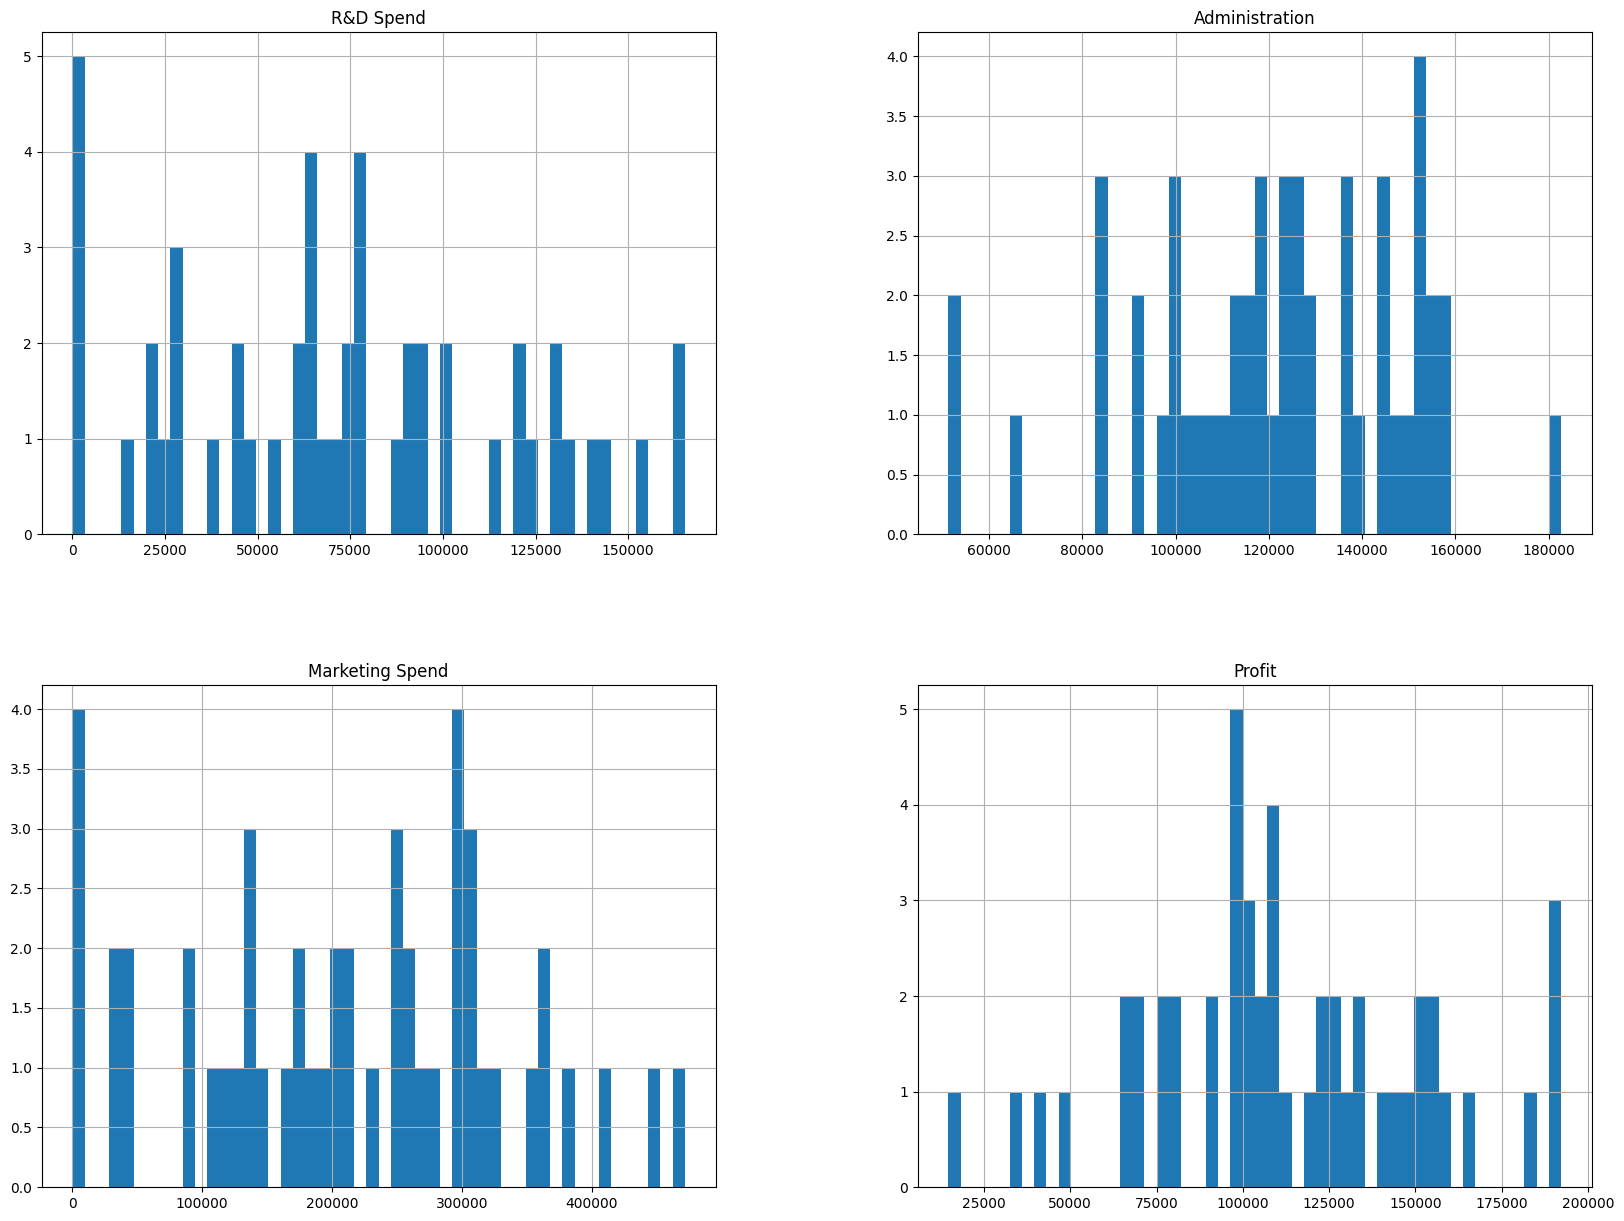

In [278]:
# Plot a histogram for each numerical attribute
dataset.hist(bins=50, figsize=(20,15))
plt.show()

### Step 3.6 Correlation between attributes (Scatter matrix with correlation results)

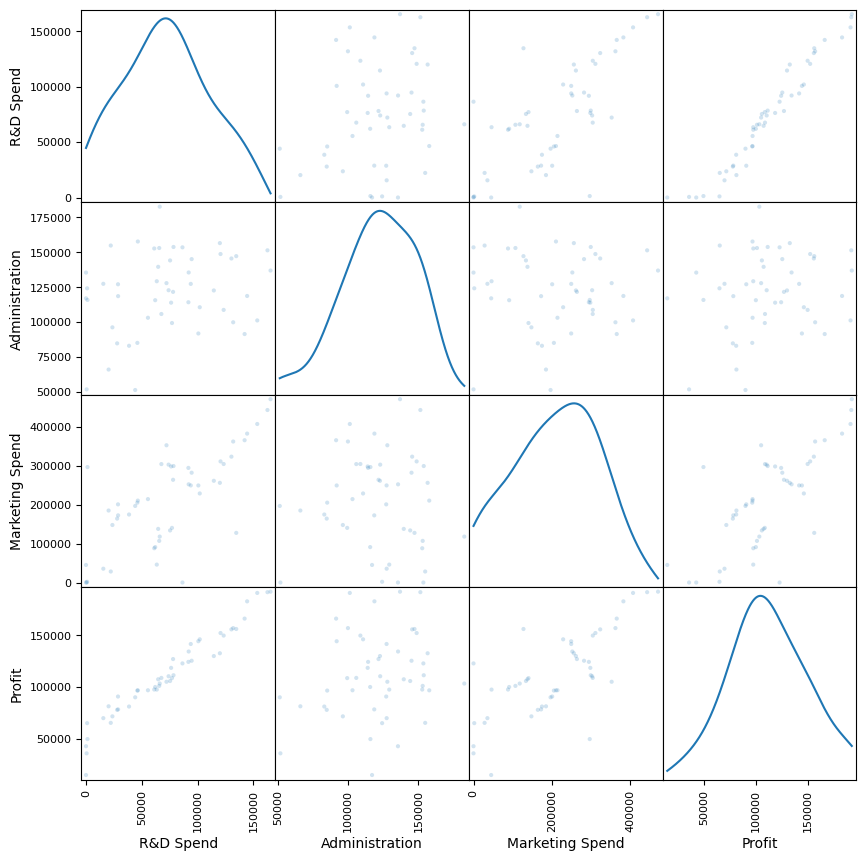

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


In [279]:
# Create a scatter matrix of the features in the dataset
scatter_matrix(dataset, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

# Print the correlation matrix of the features in the dataset
print(dataset.corr())

### 3.8 Experiment with attribute combinations

In [280]:
# Create new attributes by combining existing ones
dataset['RD_to_Marketing'] = dataset['R&D Spend'] / dataset['Marketing Spend']
dataset['Admin_to_Marketing'] = dataset['Administration'] / dataset['Marketing Spend']
dataset['RD_to_Admin'] = dataset['R&D Spend'] / dataset['Administration']

print(dataset.corr())

                    R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend            1.000000        0.241955         0.724248  0.972900   
Administration       0.241955        1.000000        -0.032154  0.200717   
Marketing Spend      0.724248       -0.032154         1.000000  0.747766   
Profit               0.972900        0.200717         0.747766  1.000000   
RD_to_Marketing      0.238382        0.390420        -0.385462  0.196444   
Admin_to_Marketing  -0.291931        0.048160        -0.360541 -0.238996   
RD_to_Admin          0.923485       -0.084226         0.736811  0.917487   

                    RD_to_Marketing  Admin_to_Marketing  RD_to_Admin  
R&D Spend                  0.238382           -0.291931     0.923485  
Administration             0.390420            0.048160    -0.084226  
Marketing Spend           -0.385462           -0.360541     0.736811  
Profit                     0.196444           -0.238996     0.917487  
RD_to_Marketing            1.000000 

### 4.2 Feature selection

In [281]:
# Drop the 'RD_to_Marketing' and 'Admin_to_Marketing' columns from the dataset
dataset = dataset.drop(['RD_to_Marketing', 'Admin_to_Marketing'], axis=1)

### 4.5 Feature Scaling


In [282]:
# Create a pipeline with StandardScaler and LinearRegression
from sklearn.metrics import mean_squared_error

pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Use the pipeline to fit the data
pipeline.fit(X, y)

# Use the pipeline to make predictions
predictions = pipeline.predict(X)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y, predictions, squared=False)
print(f'Root Mean Square Error: {rmse}')

Root Mean Square Error: 8855.34448901514


C:\Users\bekir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Step 6.1 Fine-Tune the hyperparameters using cross-validation (Grid search on the LinearRegression algorithm)

In [283]:
full_pipeline = make_pipeline(StandardScaler(),LinearRegression())
full_pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [284]:
param_grid = [{'linearregression__fit_intercept': [False, True], 'linearregression__positive': [False,True]}]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring = 'neg_root_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid=[{'linearregression__fit_intercept': [False, True],
                          'linearregression__positive': [False, True]}],
             scoring='neg_root_mean_squared_error')